# Sentiment Analysis EDA for CBE

This notebook demonstrates how to perform sentiment analysis and EDA on bank reviews using TextBlob and VADER.

## Setup and imports

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys



In [1]:
# Text processing and sentiment analysis
import vaderSentiment
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer



In [4]:
# List all available styles
print("Available styles:", plt.style.available)

# Use a valid style - try 'seaborn-v0_8' or 'seaborn-darkgrid' if available
plt.style.use('seaborn-v0_8')  # or 'seaborn-darkgrid', 'seaborn-whitegrid', etc.
sns.set_palette("viridis")

Available styles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## Load the data

In [5]:
# Import required libraries
from pathlib import Path
import pandas as pd

def load_cbe_data():
    """Load preprocessed data for CBE"""
    file_path = Path('C:/Users/My Device/Desktop/Week-2/data/processed/cleaned_bank_reviews_cbe.csv')
    try:
        cbe_data = pd.read_csv(file_path)
        print(f"Successfully loaded CBE data with {len(cbe_data)} reviews")
        return cbe_data
    except FileNotFoundError:
        print(f"Error: Could not find CBE data file at {file_path}")
        return None

# Load CBE data
cbe_data = load_cbe_data()

# Display sample data if loaded
if cbe_data is not None:
    print("\nSample data from CBE:")
    display(cbe_data.head(2))
    print(f"Total reviews: {len(cbe_data)}")
    print(f"Available columns: {list(cbe_data.columns)}")
    
    # Basic statistics
    print("\nBasic Statistics:")
    print(f"Date range: {cbe_data['date'].min()} to {cbe_data['date'].max()}")
    print("\nRating distribution:")
    print(cbe_data['rating'].value_counts().sort_index())
else:
    print("Failed to load CBE data. Please check the file path and try again.")

Successfully loaded CBE data with 7967 reviews

Sample data from CBE:


,review,rating,date,bank,source
0,"WHAT A USELESS APP! Transfers, wallet payments...",1,2025-09-13,CBE,Google Play Store
1,"Most of the time when I try to open the app, i...",2,2025-09-24,CBE,Google Play Store


Total reviews: 7967
Available columns: ['review', 'rating', 'date', 'bank', 'source']

Basic Statistics:
Date range: 2014-02-17 to 2025-11-27

Rating distribution:
rating
1    1199
2     318
3     489
4     822
5    5139
Name: count, dtype: int64


## Initialize Sentiment Analyser

In [6]:
# Self-contained SentimentAnalyzer class
class SentimentAnalyzer:
    """
    A self-contained sentiment analyzer using both TextBlob and VADER.
    """
    def __init__(self):
        """Initialize the sentiment analyzer with VADER's SentimentIntensityAnalyzer."""
        from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
        from textblob import TextBlob
        self.TextBlob = TextBlob
        self.analyzer = SentimentIntensityAnalyzer()
    
    def analyze_textblob(self, text):
        """Analyze sentiment using TextBlob."""
        try:
            analysis = self.TextBlob(str(text))
            return {
                'polarity': analysis.sentiment.polarity,
                'subjectivity': analysis.sentiment.subjectivity,
                'sentiment': self._categorize_sentiment(analysis.sentiment.polarity)
            }
        except Exception as e:
            print(f"Error in TextBlob analysis: {e}")
            return {'polarity': 0, 'subjectivity': 0, 'sentiment': 'error'}
    
    def analyze_vader(self, text):
        """Analyze sentiment using VADER."""
        try:
            vs = self.analyzer.polarity_scores(str(text))
            return {
                'vader_compound': vs['compound'],
                'vader_sentiment': self._categorize_vader(vs['compound'])
            }
        except Exception as e:
            print(f"Error in VADER analysis: {e}")
            return {'vader_compound': 0, 'vader_sentiment': 'error'}
    
    @staticmethod
    def _categorize_sentiment(score):
        """Categorize TextBlob score."""
        if score > 0.1: return 'positive'
        if score < -0.1: return 'negative'
        return 'neutral'
    
    @staticmethod
    def _categorize_vader(score):
        """Categorize VADER score."""
        if score >= 0.05: return 'positive'
        if score <= -0.05: return 'negative'
        return 'neutral'
    
    def analyze_reviews(self, reviews):
        """Analyze a list of reviews."""
        import pandas as pd
        results = []
        for i, review in enumerate(reviews, 1):
            if i % 100 == 0 or i == 1 or i == len(reviews):
                print(f"Processing review {i}/{len(reviews)}")
            tb = self.analyze_textblob(review)
            vd = self.analyze_vader(review)
            results.append({**tb, **vd})
        return pd.DataFrame(results)

# Initialize the analyzer
print("Initializing sentiment analyzer...")
analyzer = SentimentAnalyzer()
print("Sentiment analyzer ready!")

Initializing sentiment analyzer...
Sentiment analyzer ready!


## Perform Sentiment Analysis

In [8]:
def analyze_sentiments(df, bank_name):
    """Perform sentiment analysis on a dataframe"""
    print(f"Analyzing {bank_name.upper()}...")
    # Use analyze_reviews instead of analyze_dataframe
    sentiment_results = analyzer.analyze_reviews(df['review'])
    # Combine the results with the original dataframe
    return pd.concat([df.reset_index(drop=True), sentiment_results], axis=1)

# Analyze CBE data
if cbe_data is not None:
    analyzed_data = {
        'cbe': analyze_sentiments(cbe_data, 'cbe')
    }
    # Display the first few rows to verify
    display(analyzed_data['cbe'].head())
else:
    print("Error: CBE data not loaded")
    analyzed_data = {}

Analyzing CBE...
Processing review 1/7967
Processing review 100/7967
Processing review 200/7967
Processing review 300/7967
Processing review 400/7967
Processing review 500/7967
Processing review 600/7967
Processing review 700/7967
Processing review 800/7967
Processing review 900/7967
Processing review 1000/7967
Processing review 1100/7967
Processing review 1200/7967
Processing review 1300/7967
Processing review 1400/7967
Processing review 1500/7967
Processing review 1600/7967
Processing review 1700/7967
Processing review 1800/7967
Processing review 1900/7967
Processing review 2000/7967
Processing review 2100/7967
Processing review 2200/7967
Processing review 2300/7967
Processing review 2400/7967
Processing review 2500/7967
Processing review 2600/7967
Processing review 2700/7967
Processing review 2800/7967
Processing review 2900/7967
Processing review 3000/7967
Processing review 3100/7967
Processing review 3200/7967
Processing review 3300/7967
Processing review 3400/7967
Processing revi

,review,rating,date,bank,source,polarity,subjectivity,sentiment,vader_compound,vader_sentiment
0,"WHAT A USELESS APP! Transfers, wallet payments...",1,2025-09-13,CBE,Google Play Store,-0.241667,0.245833,negative,-0.8279,negative
1,"Most of the time when I try to open the app, i...",2,2025-09-24,CBE,Google Play Store,0.008929,0.380357,neutral,0.1779,positive
2,I use the Commercial Bank of Ethiopia mobile a...,5,2025-08-22,CBE,Google Play Store,0.272222,0.478889,positive,0.9637,positive
3,"It is good app and really user friendly , but ...",4,2025-09-05,CBE,Google Play Store,0.170833,0.690833,positive,0.9368,positive
4,"I love this app. really, but with some downsid...",4,2025-08-22,CBE,Google Play Store,0.316667,0.383333,positive,0.8945,positive


## Visualize Sentiment Distribution

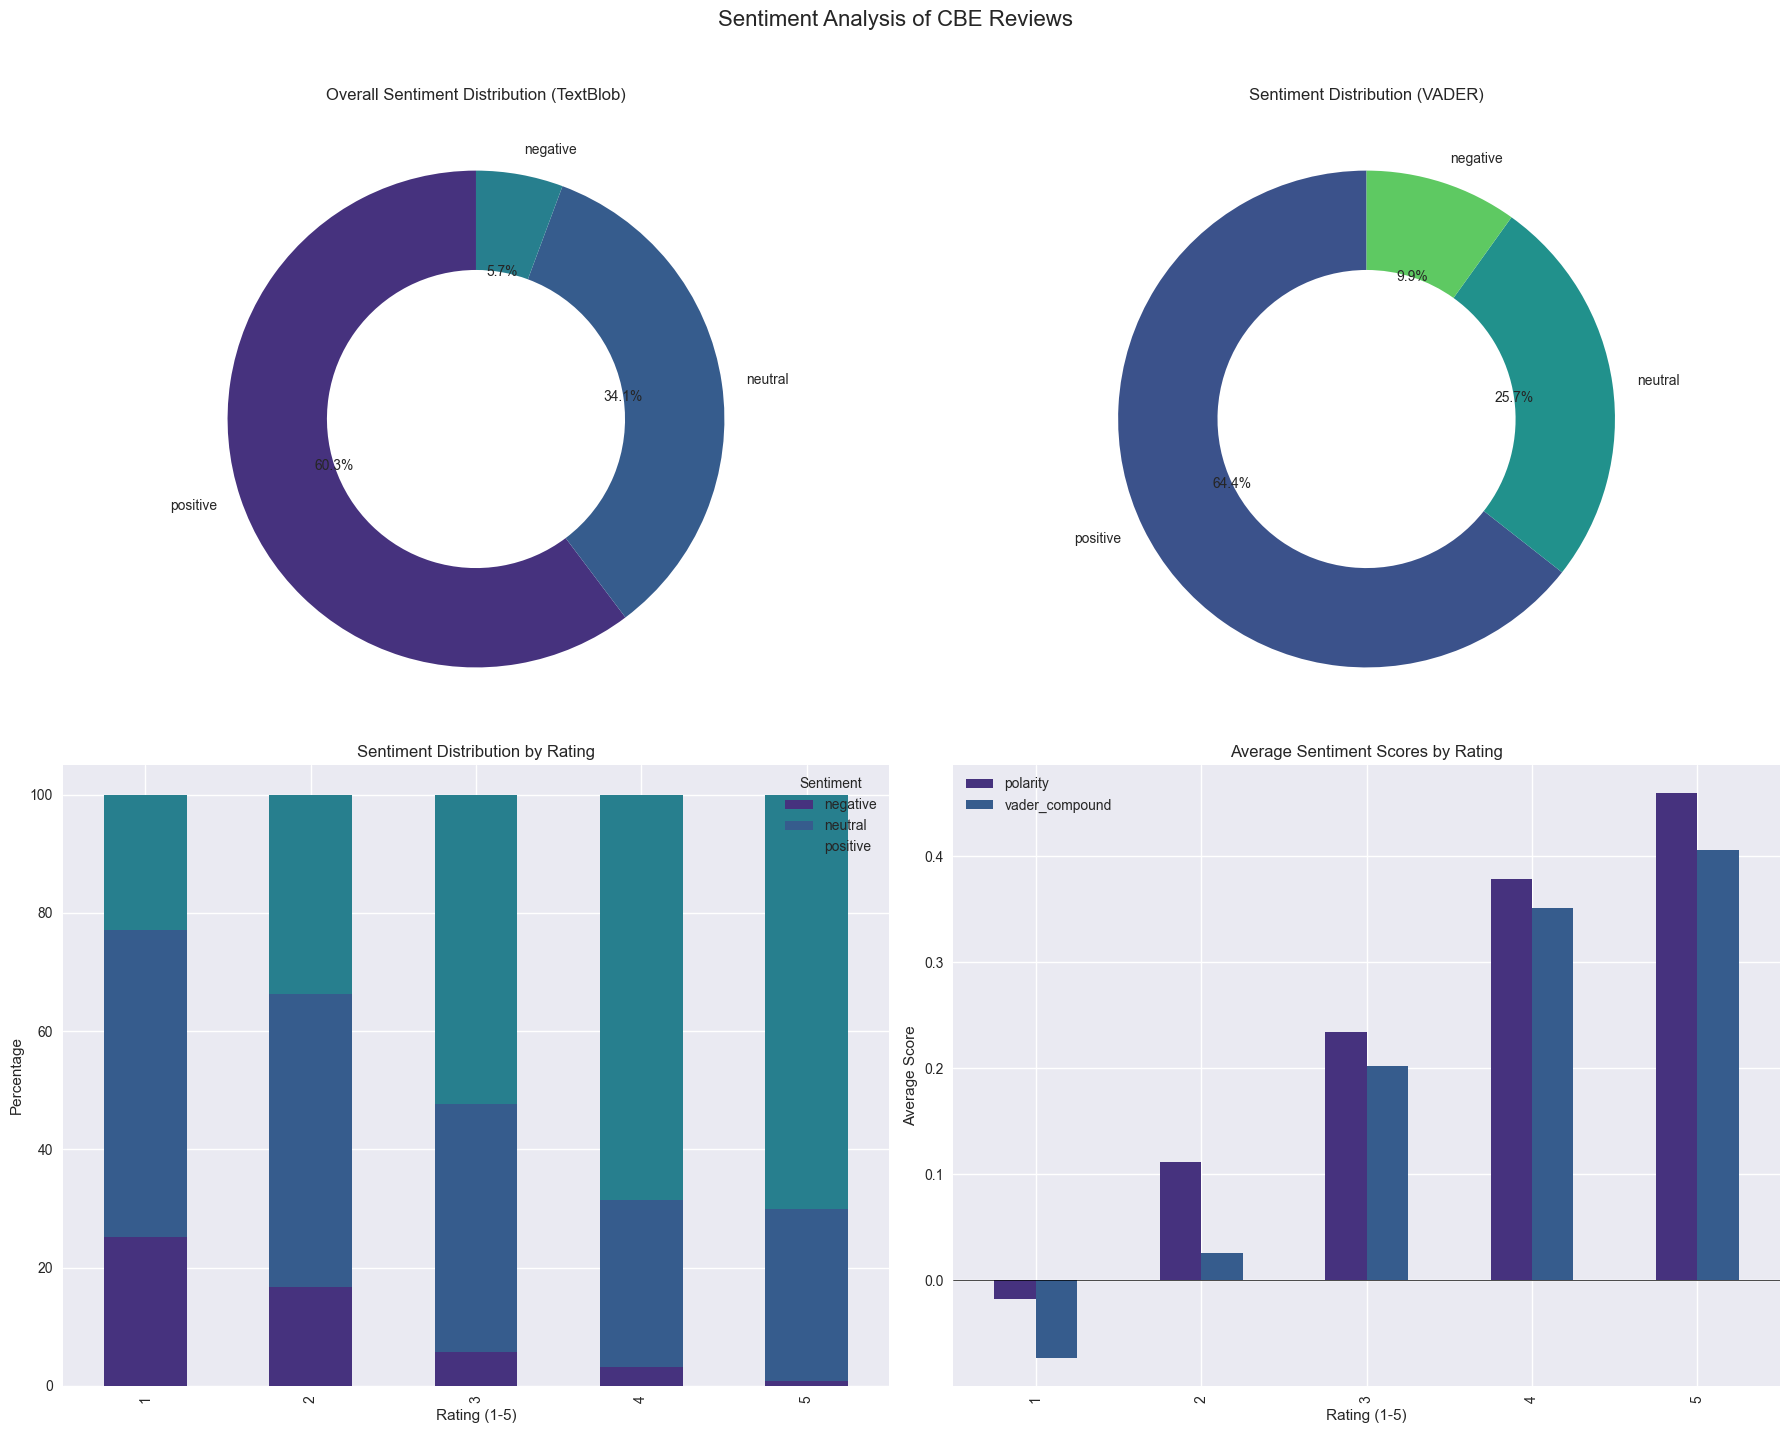

In [9]:
# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

def plot_sentiment_distribution(analyzed_data):
    """Plot sentiment distribution for CBE"""
    if not analyzed_data:
        print("No data to visualize")
        return
    
    df = analyzed_data['cbe']
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle('Sentiment Analysis of CBE Reviews', fontsize=16, y=1.02)
    
    # 1. Overall Sentiment Distribution
    sentiment_counts = df['sentiment'].value_counts()
    axes[0, 0].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
                   startangle=90, wedgeprops=dict(width=0.4))
    axes[0, 0].set_title('Overall Sentiment Distribution (TextBlob)')
    
    # 2. VADER Sentiment Distribution
    vader_counts = df['vader_sentiment'].value_counts()
    axes[0, 1].pie(vader_counts, labels=vader_counts.index, autopct='%1.1f%%',
                   startangle=90, wedgeprops=dict(width=0.4), colors=sns.color_palette('viridis', 3))
    axes[0, 1].set_title('Sentiment Distribution (VADER)')
    
    # 3. Sentiment by Rating
    if 'rating' in df.columns:
        sentiment_by_rating = pd.crosstab(df['rating'], df['sentiment'], normalize='index') * 100
        sentiment_by_rating.plot(kind='bar', stacked=True, ax=axes[1, 0])
        axes[1, 0].set_title('Sentiment Distribution by Rating')
        axes[1, 0].set_xlabel('Rating (1-5)')
        axes[1, 0].set_ylabel('Percentage')
        axes[1, 0].legend(title='Sentiment')
    
    # 4. Average Sentiment Scores by Rating
    if 'rating' in df.columns:
        avg_scores = df.groupby('rating')[['polarity', 'vader_compound']].mean()
        ax = avg_scores.plot(kind='bar', ax=axes[1, 1])
        ax.set_title('Average Sentiment Scores by Rating')
        ax.set_xlabel('Rating (1-5)')
        ax.set_ylabel('Average Score')
        ax.axhline(0, color='black', linewidth=0.5)
    
    plt.tight_layout()
    plt.savefig('cbe_sentiment_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the function with your analyzed data
plot_sentiment_distribution(analyzed_data)

## Analysis of Sentiments by Rating

<Figure size 1400x600 with 0 Axes>

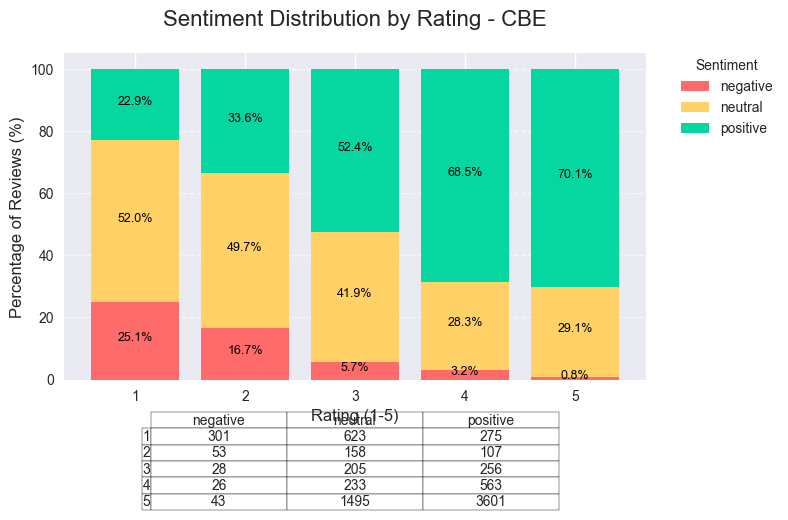

<Figure size 1000x500 with 0 Axes>

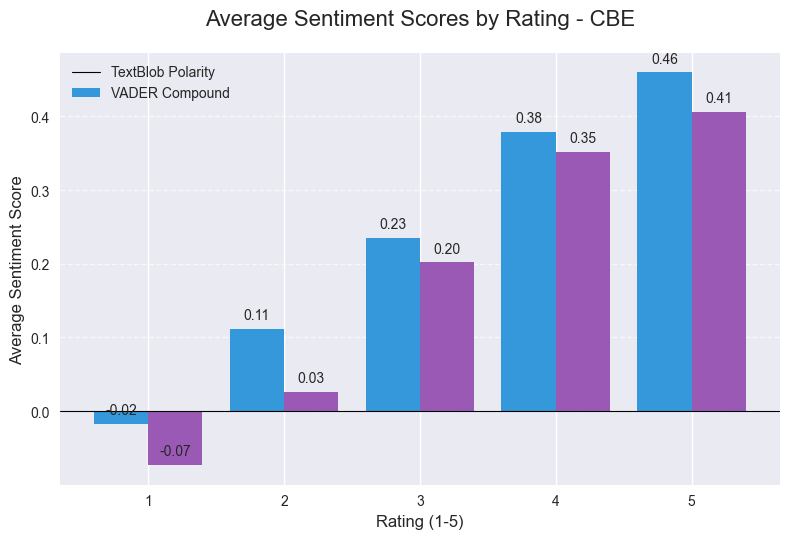

In [10]:
def plot_cbe_sentiment_by_rating(analyzed_data):
    """Plot sentiment analysis by rating for CBE"""
    if not analyzed_data or 'cbe' not in analyzed_data:
        print("No CBE data available for visualization")
        return
    
    df = analyzed_data['cbe']
    
    # Create figure
    plt.figure(figsize=(14, 6))
    
    # 1. Sentiment Distribution by Rating
    # Create a cross-tabulation of ratings and sentiments
    sentiment_by_rating = pd.crosstab(df['rating'], df['sentiment'])
    
    # Convert counts to percentages
    sentiment_pct = sentiment_by_rating.div(sentiment_by_rating.sum(axis=1), axis=0) * 100
    
    # Plot stacked bar chart
    ax = sentiment_pct.plot(kind='bar', stacked=True, 
                           color=['#ff6b6b', '#ffd166', '#06d6a0'],
                           width=0.8)
    
    # Customize the plot
    plt.title('Sentiment Distribution by Rating - CBE', fontsize=16, pad=20)
    plt.xlabel('Rating (1-5)', fontsize=12)
    plt.ylabel('Percentage of Reviews (%)', fontsize=12)
    plt.xticks(rotation=0)
    
    # Add percentage labels on each segment
    for i in ax.containers:
        ax.bar_label(i, label_type='center', fmt='%.1f%%', 
                    color='black', fontsize=9, padding=2)
    
    # Move legend outside the plot
    plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), 
              loc='upper left', borderaxespad=0.)
    
    # Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add a table with the raw counts
    plt.table(cellText=sentiment_by_rating.values, 
              rowLabels=sentiment_by_rating.index,
              colLabels=sentiment_by_rating.columns,
              cellLoc='center', 
              loc='bottom',
              bbox=[0.15, -0.4, 0.7, 0.3])
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.3)  # Make room for the table
    plt.savefig('cbe_sentiment_by_rating.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 2. Average Sentiment Scores by Rating
    plt.figure(figsize=(10, 5))
    
    # Calculate average scores
    avg_scores = df.groupby('rating')[['polarity', 'vader_compound']].mean()
    
    # Plot the data
    ax = avg_scores.plot(kind='bar', 
                        color=['#3498db', '#9b59b6'],
                        width=0.8)
    
    # Customize the plot
    plt.title('Average Sentiment Scores by Rating - CBE', fontsize=16, pad=20)
    plt.xlabel('Rating (1-5)', fontsize=12)
    plt.ylabel('Average Sentiment Score', fontsize=12)
    plt.xticks(rotation=0)
    plt.axhline(0, color='black', linewidth=0.8)
    
    # Add value labels
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 10), 
                   textcoords='offset points')
    
    plt.legend(['TextBlob Polarity', 'VADER Compound'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('cbe_avg_scores_by_rating.png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the function with your analyzed data
plot_cbe_sentiment_by_rating(analyzed_data)

## Save Analysis Results

In [11]:
def save_analysis_results(analyzed_data, output_dir='../reports'):
    """
    Save the analyzed data to CSV files.
    
    Args:
        analyzed_data: Dictionary containing the analyzed DataFrames
        output_dir: Directory to save the output files
    """
    import os
    from pathlib import Path
    
    # Create output directory if it doesn't exist
    output_path = Path(output_dir)
    output_path.mkdir(parents=True, exist_ok=True)
    
    # Save each bank's data
    for bank_name, df in analyzed_data.items():
        # Create a timestamp for the filename
        from datetime import datetime
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        
        # Define the output filename
        filename = f"sentiment_analysis_{bank_name}_{timestamp}.csv"
        filepath = output_path / filename
        
        # Save to CSV
        df.to_csv(filepath, index=False)
        print(f"Saved {len(df)} records to {filepath}")
    
    print("\nAnalysis results saved successfully!")

# Save the results
save_analysis_results(analyzed_data)

Saved 7967 records to ..\reports\sentiment_analysis_cbe_20251129_151156.csv

Analysis results saved successfully!


## Generate Summary Report

In [12]:
def generate_summary_report(analyzed_data, output_file='../reports/sentiment_analysis_summary.md'):
    """Generate a markdown summary report for sentiment analysis"""
    from pathlib import Path
    
    # Create reports directory if it doesn't exist
    report_dir = Path(output_file).parent
    report_dir.mkdir(parents=True, exist_ok=True)
    
    report = [
        "# Sentiment Analysis Summary Report\n",
        "## Overview\n",
        "This report summarizes the sentiment analysis of CBE reviews.\n"
    ]
    
    # Overall stats
    report.append("## Overall Statistics\n")
    
    for bank, df in analyzed_data.items():
        if df is None:
            report.append(f"### {bank.upper()}\nNo data available\n")
            continue
            
        total = len(df)
        if total == 0:
            report.append(f"### {bank.upper()}\nNo reviews found\n")
            continue
            
        # TextBlob Sentiment
        tb_pos = (df['sentiment'] == 'positive').sum()
        tb_neu = (df['sentiment'] == 'neutral').sum()
        tb_neg = (df['sentiment'] == 'negative').sum()
        
        # VADER Sentiment
        vd_pos = (df['vader_sentiment'] == 'positive').sum()
        vd_neu = (df['vader_sentiment'] == 'neutral').sum()
        vd_neg = (df['vader_sentiment'] == 'negative').sum()
        
        # Rating distribution
        rating_dist = df['rating'].value_counts().sort_index().to_dict() if 'rating' in df.columns else {}
        
        report.extend([
            f"### {bank.upper()}",
            f"- **Total Reviews Analyzed**: {total}",
            f"- **Date Range**: {df['date'].min()} to {df['date'].max()}" if 'date' in df.columns else "",
            "",
            "#### TextBlob Analysis",
            f"- Positive: {tb_pos} ({tb_pos/total:.1%})",
            f"- Neutral: {tb_neu} ({tb_neu/total:.1%})",
            f"- Negative: {tb_neg} ({tb_neg/total:.1%})",
            "",
            "#### VADER Analysis",
            f"- Positive: {vd_pos} ({vd_pos/total:.1%})",
            f"- Neutral: {vd_neu} ({vd_neu/total:.1%})",
            f"- Negative: {vd_neg} ({vd_neg/total:.1%})",
            "",
            "#### Rating Distribution",
            *[f"- {star}★: {count} ({(count/total):.1%})" for star, count in sorted(rating_dist.items())],
            ""
        ])
    
    # Add visualization references
    report.extend([
        "## Visualizations\n",
        "### Sentiment by Rating",
        "![Sentiment by Rating](../reports/figures/cbe_sentiment_by_rating.png)\n",
        "### Average Sentiment Scores",
        "![Average Scores](../reports/figures/cbe_avg_scores_by_rating.png)\n",
        "---\n",
        "Report generated on: " + pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S")
    ])
    
    # Save the report
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write('\n'.join(line for line in report if line != ""))
    
    print(f"Report generated: {output_file}")

# Generate the report
generate_summary_report(analyzed_data)

Report generated: ../reports/sentiment_analysis_summary.md
